# Select Frames per video - Create Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import uuid
import math

In [2]:
root = r"C:\Users\XPC\Desktop\LESCO-dataset"

classes_ = []
files_ = []

for path, subdirs, files in os.walk(root):
    for name in files:
        class_name = os.path.basename(path)
        file_path = path + '\\' + name
        classes_.append(class_name)
        files_.append(file_path)
        
print(len(files_), "video files detected")

117 video files detected


## Choose Frames for Each Video

26
yo


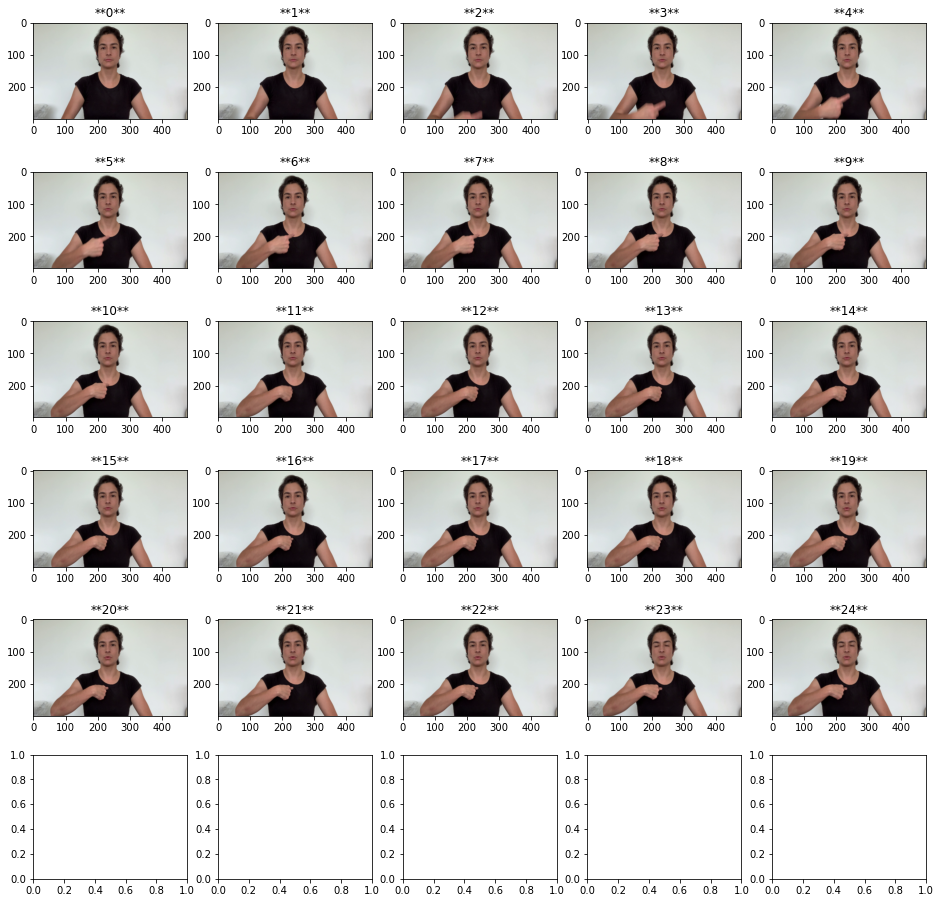

In [228]:
video_index = 116
video_frames = []
video_url = files_[video_index]

cap = cv.VideoCapture(video_url)
count = 0
while cap.isOpened():

    ret, frame = cap.read()
    if not ret:
        break

    frame = cv.resize(frame, (480,300), interpolation = cv.INTER_AREA) 
    video_frames.append(frame)
    count = count + 1

cap.release()

print(len(video_frames))
print(classes_[video_index])

video = video_frames[1:80]
count = len(video)
n_row = int(math.sqrt(count)+1)
n_col = int(math.sqrt(count))
_, axs = plt.subplots(n_row, n_col, figsize=(16, 16))
axs = axs.flatten()

i = 0
for img, ax in zip(video, axs):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title("**" + str(i) + "**")
    i += 1

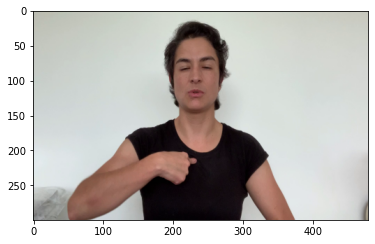

In [225]:
img = cv.cvtColor(video[23], cv.COLOR_BGR2RGB)
plt.imshow(img)

In [226]:
# frames to save from video array
selected_frames = [7, 23]

root = r'C:\Users\XPC\Desktop\single-frame'
for frame_num in selected_frames:
    cv.imwrite(root + '\\' + str(uuid.uuid4()) + '_' + classes_[video_index] + '.png', video[frame_num])